Seq2Topt: 0-40, R2 = 0.423, n = 151
Seq2Topt: 40-60, R2 = 0.501, n = 55
Seq2Topt: 60-80, R2 = 0.690, n = 36
Seq2Topt: 80-100, R2 = 0.658, n = 51
Tomer_Topt: 0-40, R2 = 0.569, n = 151
Tomer_Topt: 40-60, R2 = 0.388, n = 55
Tomer_Topt: 60-80, R2 = 0.654, n = 36
Tomer_Topt: 80-100, R2 = 0.530, n = 51


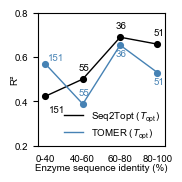

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
from os.path import join
BASE_DATA_PATH = "../Data/"
# Read topt data
topt = pd.read_csv(f'{BASE_DATA_PATH}Seq2Topt_topt_identity.csv')
tomer_topt = pd.read_csv(f'{BASE_DATA_PATH}tomer_identity.csv')
topt = topt[topt['Test'] == 1]
tomer_topt = tomer_topt[tomer_topt['Test'] == 1]
# Ensure necessary columns exist
required_columns = ['identity', 'topt', 'prediction']

# Check Seq2Topt data
for col in required_columns:
    if col not in topt.columns:
        raise ValueError(f"Missing column '{col}' in Seq2Topt data.")

# Check tomer_topt data
for col in required_columns:
    if col not in tomer_topt.columns:
        raise ValueError(f"Missing column '{col}' in tomer_topt data.")

# Define bins/splits
all_splits = [0, 40, 60, 80, 100]
lower_bounds = all_splits[:-1]
upper_bounds = all_splits[1:]
splits = [f"{lower_bounds[i]}-{upper_bounds[i]}" for i in range(len(lower_bounds))]
plt.rcParams.update({
    'font.size': 7,
    'font.family': 'Arial',
    'mathtext.fontset': 'custom',  # Important: allows custom math fonts
    'mathtext.rm': 'Arial',        # Set Roman font (e.g., for \mathrm)
    'mathtext.it': 'Arial:italic', # Set Italic font (e.g., for \mathit)
    'mathtext.bf': 'Arial:bold',   # Set Bold font (e.g., for \mathbf)
    'pdf.fonttype': 42,            # Ensure fonts are embedded as TrueType for editability in AI
    'ps.fonttype': 42
})

# -------------------------- Plot topt chart --------------------------
fig_topt, ax_topt = plt.subplots(figsize=(1.85, 1.85))

ax_topt.tick_params(axis='both', which='major', labelsize=7)

# --- Process Seq2Topt data ---
points_seq2topt = []
n_points_seq2topt = []

for i, split in enumerate(splits):
    lb, ub = lower_bounds[i], upper_bounds[i]

    # Filter Seq2Topt data
    subset_topt = topt[(topt['identity']*100 >= lb) & (topt['identity']*100 <= ub)].copy()
    n_topt = len(subset_topt)

    # Calculate topt/120 and pred_topt/120
    if n_topt > 1:
        subset_topt.loc[:, 'topt_scaled'] = subset_topt['topt'] / 120
        subset_topt.loc[:, 'pred_topt_scaled'] = subset_topt['prediction'] / 120

        # Calculate R2
        slope, intercept, r_value, p_value, std_err = linregress(subset_topt['topt_scaled'], subset_topt['pred_topt_scaled'])
        R2_topt = r_value**2
    else:
        R2_topt = np.nan # If there are not enough data points to calculate R2, set to NaN

    points_seq2topt.append(R2_topt)
    n_points_seq2topt.append(n_topt)

    print(f"Seq2Topt: {split}, R2 = {R2_topt:.3f}, n = {n_topt}")

# --- Process Tomer_Topt data ---
points_tomer = []
n_points_tomer = []

for i, split in enumerate(splits):
    lb, ub = lower_bounds[i], upper_bounds[i]

    # Filter Tomer_Topt data
    subset_tomer = tomer_topt[(tomer_topt['identity']*100 >= lb) & (tomer_topt['identity']*100 <= ub)].copy()
    n_tomer = len(subset_tomer)

    if n_tomer > 1:
        subset_tomer.loc[:, 'topt_scaled'] = subset_tomer['topt'] / 120
        subset_tomer.loc[:, 'pred_topt_scaled'] = subset_tomer['prediction'] / 120

        # Calculate R2
        slope, intercept, r_value, p_value, std_err = linregress(subset_tomer['topt_scaled'], subset_tomer['pred_topt_scaled'])
        R2_tomer = r_value**2
    else:
        R2_tomer = np.nan # If there are not enough data points to calculate R2, set to NaN

    points_tomer.append(R2_tomer)
    n_points_tomer.append(n_tomer)

    print(f"Tomer_Topt: {split}, R2 = {R2_tomer:.3f}, n = {n_tomer}")

# --- Plotting ---
ticks = np.array(range(len(splits)))
labs = splits

ax_topt.set_xticks(ticks)
ax_topt.set_xticklabels(labs, y=-0.03, fontsize=7)
ax_topt.tick_params(axis='x', length=0, rotation=0)

ax_topt.set_ylim((0.2, 0.8))  # Adjusted y limits
ax_topt.set_xlim((-0.2, 3.2))

ax_topt.set_ylabel('R²', fontsize=7)
ax_topt.set_xlabel('Enzyme sequence identity (%)', fontsize=7)
ax_topt.yaxis.set_label_coords(-0.15, 0.5)
ax_topt.xaxis.set_label_coords(0.5, -0.13)

# Plot Seq2Topt data (Black line, circle markers, labels above/right)
ax_topt.plot(ticks, points_seq2topt, c="black", linewidth=1, label=r"Seq2Topt ($\mathit{T}_\mathrm{opt}$)")
for i in range(len(splits)):
    ax_topt.scatter(ticks[i], points_seq2topt[i], c='black', marker="o", s=17) # Use s for marker size
    if not np.isnan(points_seq2topt[i]):
        maping = {0: (0.1, -0.08), 1: (-0.11, 0.03), 2: (-0.11, 0.03), 3: (-0.11, 0.03)}
        ax_topt.annotate(n_points_seq2topt[i],
                (ticks[i] + maping[i][0], points_seq2topt[i] + maping[i][1]), # X shifted right, Y shifted up
                fontsize=7, c="black", ha='left', va='bottom') # Align left, bottom of text at position

# Plot Tomer_Topt data (Blue line, circle markers, labels below/left)
# Using a specific blue color to match the image, e.g., SteelBlue: #4682B4
tomer_color = '#4682B4'
ax_topt.plot(ticks, points_tomer, c=tomer_color, linestyle="-", linewidth=1, label=r"TOMER ($\mathit{T}_\mathrm{opt}$)")
for i in range(len(splits)):
    ax_topt.scatter(ticks[i], points_tomer[i], c=tomer_color, marker="o", s=17) # Same marker as Seq2Topt for consistency with image
    if not np.isnan(points_tomer[i]):
        # Tomer: Annotation slightly to the left, below the point
        maping = {0: (0.5, 0.05), 1: (0.18, 0.07), 2: (0.18, -0.02), 3: (0.18, -0.02)}
        ax_topt.annotate(n_points_tomer[i],
            (ticks[i] + maping[i][0], points_tomer[i] + maping[i][1]), # X shifted left, Y shifted down
            fontsize=7, c=tomer_color, ha='right', va='top') # Align right, top of text at position


ax_topt.legend(loc="lower right", fontsize=7, frameon=False, borderpad=0, labelspacing=0.2)
plt.tight_layout() # Adjust layout to prevent label overlap

plt.savefig('./pdf/fig2c-topt.pdf', dpi=600, bbox_inches='tight') # Save to a new filename for distinction
plt.show()
plt.close(fig_topt)

(6350, 7)
uniprot_id                                               Q9U3M0
tm                                                    46.844896
ogt                                                        20.0
sequence      MASIGKLTDNQEMLKIFLIFTVLINCTVSVPADIPSLFSGLLNGLS...
identity                                                    0.0
Test                                                          1
prediction                                            46.682501
Name: 387, dtype: object uniprot_id                                               Q9W5A5
tm                                                    46.484314
ogt                                                        25.0
sequence      MEQPSILVKILHSIPHVNYTFRRVNDTFNPDSDVYLEPTNNKLQCQ...
identity                                                  0.233
Test                                                          1
prediction                                            47.685629
Name: 775, dtype: object uniprot_id                                  

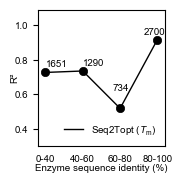

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress

BASE_DATA_PATH = "../Data/"

# Read tm data
tm = pd.read_csv(f'{BASE_DATA_PATH}Seq2Topt_tm_identity_new.csv')

# Ensure necessary columns exist
required_columns = ['identity', 'tm', 'prediction']
for col in required_columns:
    if col not in tm.columns:
        raise ValueError(f"Missing column '{col}' in tm.csv")

# Define bins/splits
tm = tm.sort_values(by='identity').reset_index(drop=True)
print(tm.shape)
print(tm.iloc[387], tm.iloc[775], tm.iloc[1162])
all_splits = [0, 40, 60, 80, 100]
lower_bounds = all_splits[:-1]
upper_bounds = all_splits[1:]
splits = [f"{lower_bounds[i]}-{upper_bounds[i]}" for i in range(len(lower_bounds))]
# -------------------------- Plot tm chart --------------------------
fig_tm, ax_tm = plt.subplots(figsize=(1.85, 1.85))
plt.rcParams.update({
    'font.size': 7,
    'font.family': 'Arial',
    'mathtext.fontset': 'custom',  # Important: allows custom math fonts
    'mathtext.rm': 'Arial',        # Set Roman font (e.g., for \mathrm)
    'mathtext.it': 'Arial:italic', # Set Italic font (e.g., for \mathit)
    'mathtext.bf': 'Arial:bold',   # Set Bold font (e.g., for \mathbf)
    'pdf.fonttype': 42,            # Ensure fonts are embedded as TrueType for editability in AI
    'ps.fonttype': 42
})
ax_tm.tick_params(axis='both', which='major', labelsize=7)

points_tm = []
n_points_tm = []

for i, split in enumerate(splits):
    lb, ub = lower_bounds[i], upper_bounds[i]

    # Filter tm data
    subset_tm = tm[(tm['identity']*100 >= lb) & (tm['identity']*100 <= ub)].copy()
    n_tm = len(subset_tm)

    # Calculate tm/100 and pred_tm/100
    if n_tm > 1:
        subset_tm.loc[:, 'tm_scaled'] = subset_tm['tm'] / 100
        subset_tm.loc[:, 'pred_tm_scaled'] = subset_tm['prediction'] / 100

        # Calculate R2
        slope, intercept, r_value, p_value, std_err = linregress(subset_tm['tm_scaled'], subset_tm['pred_tm_scaled'])
        R2_tm = r_value**2
    else:
        R2_tm = np.nan

    points_tm.append(R2_tm)
    n_points_tm.append(n_tm)

ticks = np.array(range(len(splits)))
labs = splits

ax_tm.set_xticks(ticks)
ax_tm.set_xticklabels(labs, y=-0.03, fontsize=7)
ax_tm.tick_params(axis='x', length=0, rotation=0)

ax_tm.set_ylim((0.3, 1.09))  # Adjusted y limits
ax_tm.set_xlim((-0.2, 3.2))

ax_tm.set_ylabel('R²', fontsize=7)
ax_tm.set_xlabel('Enzyme sequence identity (%)', fontsize=7)
ax_tm.yaxis.set_label_coords(-0.15, 0.5)
ax_tm.xaxis.set_label_coords(0.5, -0.13)
# ax_tm.plot([-0.15, 4], [0, 0], color='grey', linestyle='dashed')

ax_tm.plot([0, 1, 2, 3], points_tm, c="black", linewidth=1)

for i, split in enumerate(splits):
    maping = {0: (0, 0.03), 1: (0, 0.03), 2: (-0.2, 0.1), 3: (-0.38, 0.03)}
    ax_tm.scatter(i, points_tm[i], c='black', marker="o", linewidths=0.5, label=r"Seq2Topt ($\mathit{T}_\mathrm{m}$)")
    if not np.isnan(points_tm[i]):
        ax_tm.annotate(n_points_tm[i], (i + maping[i][0], points_tm[i] + + maping[i][1]), fontsize=7, c="black")

from matplotlib.lines import Line2D
custom_legend_handle = [Line2D([0], [0], color='black', lw=1)]

# 2. Create a corresponding legend "label"
custom_legend_label = [r"Seq2Topt ($\mathit{T}_\mathrm{m}$)"]

# 3. Use custom handles and labels to create the legend
#    `frameon=False` removes the legend border, making it cleaner
ax_tm.legend(handles=custom_legend_handle, labels=custom_legend_label,
             loc="lower right", fontsize=7, frameon=False)
plt.tight_layout() # Adjust layout to prevent label overlap

plt.savefig('./pdf/fig2c-tm.pdf')
plt.show()
plt.close(fig_tm)

## OGT split

--- Seq2Topt R² by OGT ---
OGT: 0-40, R2 = 0.219, n = 211
OGT: 40-60, R2 = 0.313, n = 24
OGT: 60-80, R2 = 0.148, n = 43
OGT: 80-100, R2 = 0.373, n = 24

--- TOMER R² by OGT ---
OGT: 0-40, R2 = 0.133, n = 211
OGT: 40-60, R2 = 0.256, n = 24
OGT: 60-80, R2 = 0.041, n = 43
OGT: 80-100, R2 = 0.116, n = 24


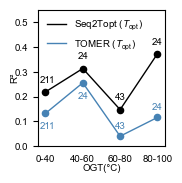

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress

BASE_DATA_PATH = "../Data/"

# --- 1. Read Data ---
seq2topt_df = pd.read_csv(f'{BASE_DATA_PATH}Seq2Topt_topt_identity.csv')
tomer_df = pd.read_csv(f'{BASE_DATA_PATH}tomer_identity.csv')
seq2topt_df = seq2topt_df[seq2topt_df['Test'] == 1]
tomer_df = tomer_df[tomer_df['Test'] == 1]
# --- 2. Check Data Integrity ---
# Ensure both DataFrames contain the required columns for OGT and Topt predictions
required_columns = ['ogt', 'topt', 'prediction']

for col in required_columns:
    if col not in seq2topt_df.columns:
        raise ValueError(f"Missing column '{col}' in Seq2Topt data.")
    if col not in tomer_df.columns:
        raise ValueError(f"Missing column '{col}' in TOMER data.")

# --- 3. Define OGT Bins/Splits ---
# Use OGT intervals consistent with the reference code
all_splits = [0, 40, 60, 80, 100]
lower_bounds = all_splits[:-1]
upper_bounds = all_splits[1:]
splits = [f"{lower_bounds[i]}-{upper_bounds[i]}" for i in range(len(lower_bounds))]

# --- 4. Set Global Plotting Styles ---
plt.rcParams.update({
    'font.size': 7,
    'font.family': 'Arial',
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Arial',
    'mathtext.it': 'Arial:italic',
    'mathtext.bf': 'Arial:bold',
    'pdf.fonttype': 42,
    'ps.fonttype': 42
})

# --- 5. Create the Plot ---
fig, ax = plt.subplots(figsize=(1.85, 1.85))
ax.tick_params(axis='both', which='major', labelsize=7)

# --- 6. Process and Calculate R² for Each Model ---

def calculate_r2_by_ogt_interval(df, intervals):
    """
    A helper function to calculate R² values for a given DataFrame across different OGT intervals.
    """
    points = []
    n_points = []
    
    for i, split_label in enumerate(intervals):
        lb, ub = lower_bounds[i], upper_bounds[i]

        # Filter data based on OGT
        subset = df[(df['ogt'] >= lb) & (df['ogt'] <= ub)].copy()
        n = len(subset)

        if n > 1:
            # Topt values need to be normalized, assuming a maximum value of 120
            subset.loc[:, 'topt_scaled'] = subset['topt'] / 120
            subset.loc[:, 'pred_scaled'] = subset['prediction'] / 120
            
            # Calculate R²
            slope, intercept, r_value, p_value, std_err = linregress(subset['topt_scaled'], subset['pred_scaled'])
            r2_value = r_value**2
        else:
            r2_value = np.nan # If there are not enough data points, R² is NaN

        points.append(r2_value)
        n_points.append(n)
        
    return points, n_points

# Calculate R² for Seq2Topt
points_seq2topt, n_points_seq2topt = calculate_r2_by_ogt_interval(seq2topt_df, splits)
print("--- Seq2Topt R² by OGT ---")
for i, split in enumerate(splits):
    print(f"OGT: {split}, R2 = {points_seq2topt[i]:.3f}, n = {n_points_seq2topt[i]}")

# Calculate R² for TOMER
points_tomer, n_points_tomer = calculate_r2_by_ogt_interval(tomer_df, splits)
print("\n--- TOMER R² by OGT ---")
for i, split in enumerate(splits):
    print(f"OGT: {split}, R2 = {points_tomer[i]:.3f}, n = {n_points_tomer[i]}")


# --- 7. Plotting ---
ticks = np.arange(len(splits))

# Set axes
ax.set_xticks(ticks)
ax.set_xticklabels(splits, y=-0.03, fontsize=7)
ax.tick_params(axis='x', length=0, rotation=0)

ax.set_ylim((0, 0.55))  # Can be fine-tuned based on actual data
ax.set_xlim((-0.2, len(splits) - 0.8)) # Dynamically set x-axis range

ax.set_ylabel('R²', fontsize=7)
ax.set_xlabel('OGT(°C)', fontsize=7)
ax.yaxis.set_label_coords(-0.15, 0.5)
ax.xaxis.set_label_coords(0.5, -0.13)

# Plot Seq2Topt (black)
ax.plot(ticks, points_seq2topt, c="black", linewidth=1, label=r"Seq2Topt ($\mathit{T}_\mathrm{opt}$)")
ax.scatter(ticks, points_seq2topt, c='black', marker="o", s=20, zorder=5) # zorder brings the points to the top layer

for i in range(len(splits)):
    if not np.isnan(points_seq2topt[i]):
        maping = {0: (0.05, 0.03), 1: (0, 0.03), 2: (0, 0.03), 3: (0, 0.03)}
        ax.annotate(n_points_seq2topt[i],
                    (ticks[i] + maping[i][0], points_seq2topt[i] + maping[i][1]), # Label above the point
                    fontsize=7, c="black", ha='center', va='bottom')

# Plot TOMER (blue)
tomer_color = '#4682B4' # SteelBlue
ax.plot(ticks, points_tomer, c=tomer_color, linestyle="-", linewidth=1, label=r"TOMER ($\mathit{T}_\mathrm{opt}$)")
ax.scatter(ticks, points_tomer, c=tomer_color, marker="o", s=20, zorder=5)

for i in range(len(splits)):
    if not np.isnan(points_tomer[i]):
        # Adjust label position
        maping = {0: (0.05, -0.035), 1: (0, -0.035), 2: (0, 0.06), 3: (0, 0.06)}
        ax.annotate(n_points_tomer[i],
                (ticks[i] + maping[i][0], points_tomer[i] + maping[i][1]),
                fontsize=7, c=tomer_color, ha='center', va='top')

# --- 8. Add Legend and Save ---
ax.legend(loc="upper left", fontsize=7, frameon=False)
plt.tight_layout()
plt.savefig('./pdf/fig2d_topt_ogt.pdf', dpi=600, bbox_inches='tight')
plt.show()
plt.close(fig)

91.82 9.76
tm: 0-40, R2 = 0.434, n = 5289
tm: 40-60, R2 = 0.710, n = 452
tm: 60-80, R2 = 0.718, n = 569
tm: 80-100, R2 = 0.717, n = 40


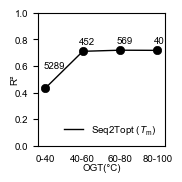

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress

BASE_DATA_PATH = "../Data/"
# identity
# Read tm data
tm = pd.read_csv(f'{BASE_DATA_PATH}Seq2Topt_tm_identity_new.csv')
print(tm.ogt.max(), tm.ogt.min())

# Ensure necessary columns exist
required_columns = ['ogt', 'tm', 'prediction']
for col in required_columns:
    if col not in tm.columns:
        raise ValueError(f"Missing column '{col}' in tm.csv")

# Define bins/splits
tm = tm.sort_values(by='ogt').reset_index(drop=True)
# print(tm.shape)
# print(tm.iloc[387], tm.iloc[775], tm.iloc[1162])
# all_splits = [0, 25, 50, 75, 100]
all_splits = [0, 40, 60, 80, 100]
lower_bounds = all_splits[:-1]
upper_bounds = all_splits[1:]
splits = [f"{lower_bounds[i]}-{upper_bounds[i]}" for i in range(len(lower_bounds))]

# -------------------------- Plot tm chart --------------------------
fig_tm, ax_tm = plt.subplots(figsize=(1.85, 1.85))
plt.rcParams.update({
    'font.size': 7,
    'font.family': 'Arial',
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Arial',
    'mathtext.it': 'Arial:italic',
    'mathtext.bf': 'Arial:bold',   
    'pdf.fonttype': 42,            
    'ps.fonttype': 42
})
ax_tm.tick_params(axis='both', which='major', labelsize=7)

points_tm = []
n_points_tm = []

for i, split in enumerate(splits):
    lb, ub = lower_bounds[i], upper_bounds[i]

    # Filter tm data
    subset_tm = tm[(tm['ogt'] >= lb) & (tm['ogt'] <= ub)].copy()
    n_tm = len(subset_tm)

    # Calculate tm/100 and pred_tm/100
    if n_tm > 1:
        subset_tm.loc[:, 'tm_scaled'] = subset_tm['tm'] / 100
        subset_tm.loc[:, 'pred_tm_scaled'] = subset_tm['prediction'] / 100

        # Calculate R2
        slope, intercept, r_value, p_value, std_err = linregress(subset_tm['tm_scaled'], subset_tm['pred_tm_scaled'])
        R2_tm = r_value**2
    else:
        R2_tm = np.nan

    points_tm.append(R2_tm)
    n_points_tm.append(n_tm)
    print(f"tm: {split}, R2 = {R2_tm:.3f}, n = {n_tm}")

ticks = np.array(range(len(splits)))
labs = splits

ax_tm.set_xticks(ticks)
ax_tm.set_xticklabels(labs, y=-0.03, fontsize=7)
ax_tm.tick_params(axis='x', length=0, rotation=0)

ax_tm.set_ylim((0, 1))  # Adjusted y limits
ax_tm.set_xlim((-0.2, 3.2))

ax_tm.set_ylabel('R²', fontsize=7)
ax_tm.set_xlabel('OGT(°C)', fontsize=7)
ax_tm.yaxis.set_label_coords(-0.15, 0.5)
ax_tm.xaxis.set_label_coords(0.5, -0.13)
# ax_tm.plot([-0.15, 4], [0, 0], color='grey', linestyle='dashed')

ax_tm.plot([0, 1, 2, 3], points_tm, c="black", linewidth=1)

for i, split in enumerate(splits):
    if i == 0:
        ax_tm.scatter(i, points_tm[i], c='black', marker="o", linewidths=0.5, label=r"Seq2Topt ($\mathit{T}_\mathrm{m}$)")
        if not np.isnan(points_tm[i]):
            ax_tm.annotate(n_points_tm[i], (i - 0.06, points_tm[i] + 0.15), fontsize=7, c="black")
    else:
        ax_tm.scatter(i, points_tm[i], c='black', marker="o", linewidths=0.5)
        if not np.isnan(points_tm[i]):
            ax_tm.annotate(n_points_tm[i], (i - 0.1, points_tm[i] + 0.05), fontsize=7, c="black")

from matplotlib.lines import Line2D
custom_legend_handle = [Line2D([0], [0], color='black', lw=1)]

# 2. Create a corresponding legend "label"
custom_legend_label = [r"Seq2Topt ($\mathit{T}_\mathrm{m}$)"]

# 3. Use custom handles and labels to create the legend
#    `frameon=False` removes the legend border, making it cleaner
ax_tm.legend(handles=custom_legend_handle, labels=custom_legend_label,
             loc="lower right", fontsize=7, frameon=False)
plt.tight_layout() # Adjust layout to prevent label overlap

plt.savefig('./pdf/fig2d-tm_ogt.pdf')
plt.show()
plt.close(fig_tm)